###### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

###### Reading the dataset

In [2]:
ckd_df = pd.read_csv('Loan_Status.csv')

#Check the shape
print(ckd_df.shape)

(614, 13)


In [3]:
#check the columns
ckd_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

###### Rename the columns to have meaningful names

###### Observing the data

In [4]:
ckd_df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,LP001024
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
Dependents,0,1,0,0,0,2,0,3+,2,1,2
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,No
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841,3200
CoapplicantIncome,0,1508,0,2358,0,4196,1516,2504,1526,10968,700
LoanAmount,NaN,128,66,120,141,267,95,158,168,349,70
Loan_Amount_Term,360,360,360,360,360,360,360,360,360,360,360


In [ ]:
# warnings

In [5]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.style as style
style.use('fivethirtyeight')

In [8]:
for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,12]=='Y':
        ckd_df.iloc[i,12]='1'
    if ckd_df.iloc[i,12]=='N':
        ckd_df.iloc[i,12]='0'
        
ckd_df['Loan_Status'].astype(int)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

##### One-Hot Encoding

In [9]:
onehotdata=pd.get_dummies(ckd_df,drop_first=True,prefix_sep=': ')
onehotdata.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
ApplicantIncome,5849.0,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,3200.0,2500.0,3073.0
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,700.0,1840.0,8106.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,70.0,109.0,200.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Education: Not Graduate,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Self_Employed: Yes,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Property_Area: Semiurban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Property_Area: Urban,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [10]:
#onehotdata['Loan_Status'].astype(int)

In [11]:
# define imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

impute_columns=list(set(onehotdata.columns)-set(["Loan_Status"]))  # Update last column name
print(impute_columns)

['Loan_ID: LP001013', 'Loan_ID: LP001052', 'Loan_ID: LP002792', 'Loan_ID: LP002659', 'Loan_ID: LP001914', 'Loan_ID: LP001120', 'Loan_ID: LP001087', 'Loan_ID: LP002723', 'Loan_ID: LP002862', 'Loan_ID: LP001248', 'Loan_ID: LP002106', 'Loan_ID: LP002345', 'Loan_ID: LP001536', 'Loan_ID: LP001749', 'Loan_ID: LP002234', 'Loan_ID: LP001225', 'Loan_ID: LP001888', 'Loan_ID: LP002308', 'Loan_ID: LP002978', 'Loan_ID: LP001998', 'Loan_ID: LP002911', 'Loan_ID: LP002600', 'Loan_ID: LP001385', 'Loan_ID: LP001349', 'Loan_ID: LP001907', 'Loan_ID: LP002767', 'Loan_ID: LP002950', 'Loan_ID: LP001222', 'Loan_ID: LP002377', 'Loan_ID: LP002226', 'Loan_ID: LP002130', 'Loan_ID: LP001868', 'Loan_ID: LP001050', 'Loan_ID: LP002832', 'Loan_ID: LP002305', 'Loan_ID: LP002813', 'Loan_ID: LP002139', 'Loan_ID: LP001116', 'Loan_ID: LP002422', 'Loan_ID: LP001520', 'Loan_ID: LP002798', 'Loan_ID: LP002043', 'Loan_ID: LP001151', 'Loan_ID: LP001698', 'Loan_ID: LP002585', 'Loan_ID: LP001953', 'Loan_ID: LP002556', 'Loan_ID: LP

In [12]:
imputer.fit(onehotdata[impute_columns])     

KNNImputer()

In [13]:
X_trans=pd.DataFrame(imputer.transform(onehotdata[impute_columns]), columns=impute_columns)

In [14]:
X_trans.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Loan_ID: LP001013,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_ID: LP001052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_ID: LP002792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_ID: LP002659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_ID: LP001914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Loan_ID: LP001310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_ID: LP001275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_ID: LP002545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_ID: LP002403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Modelling

In [15]:
X=X_trans
y=ckd_df["Loan_Status"]  # Update last column name
X_prod=X_trans
print(X.shape)
print(y.shape)
print(X_prod.shape)

(614, 628)
(614,)
(614, 628)


In [16]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: object

###### Predictive Models with hyperparameter tuning Section

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV 

In [18]:
def display_confusion_matrix(y_test,y_pred):
    
    cm = confusion_matrix(y_test, y_pred_lr)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    print(classification_report(y_test, y_pred))

In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [20]:
##Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 628)
(123, 628)
(491,)
(123,)


In [21]:
models= ['LogisticRegression', 'Support Vector Machine', 'Artificial neural network']

###### StandardScaler data with PCA implementation

In [22]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [23]:
# Applying PCA function on training and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.00564402, 0.00533002])

##### Logistic Regression Hyper parameter tuning

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7718202432488147
Best estimator is LogisticRegression(C=0.05179474679231213) 


              precision    recall  f1-score   support

           0       0.80      0.22      0.34        37
           1       0.74      0.98      0.84        86

    accuracy                           0.75       123
   macro avg       0.77      0.60      0.59       123
weighted avg       0.76      0.75      0.69       123


Accuracy of Logistic Regression is : 0.7479674796747967
Computation time 0.383 - Sec


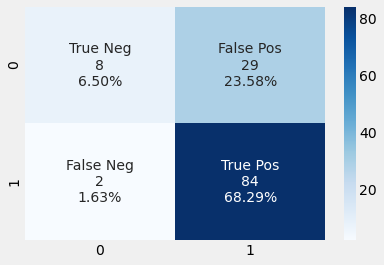

In [24]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

start_lr = time.time()
lr = GridSearchCV(LogisticRegression(), 
                  param_grid, 
                  cv = 5) 
lr.fit(X_train, y_train) 
end_lr = time.time()
final_lr = end_lr - start_lr
final_lr = round(final_lr,3)
final_lr

# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_)) 
print("Best score is {}".format(lr.best_score_))
print("Best estimator is {} \n\n".format(lr.best_estimator_))

y_pred_lr = lr.predict(X_test)
display_confusion_matrix(y_test, y_pred_lr)
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("\nAccuracy of Logistic Regression is :", accuracy_lr)
print("Computation time {} - Sec".format(final_lr))

In [26]:
auc = roc_auc_score(y_test, y_pred_lr)
print('AUC: %.2f' % auc)

#fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
#plot_roc_curve(fpr, tpr)

AUC: 0.60


##### Support Vector Machine Hyper parameter tuning

In [28]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

start_svm = time.time()
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
svm.fit(X_train, y_train)

end_svm = time.time()
final_svm = end_svm - start_svm
final_svm = round(final_svm,3)
final_svm

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svm.best_params_)) 
print("Best score is {}".format(svm.best_score_))
print("Best estimator is {}".format(svm.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.717, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.735, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.745, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.745, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.747, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.735, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.828, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.704, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.745, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.806, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.828, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.714, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.859, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.724, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.735, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.827, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.704, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.798, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.3s finished


              precision    recall  f1-score   support

           0       0.89      0.22      0.35        37
           1       0.75      0.99      0.85        86

    accuracy                           0.76       123
   macro avg       0.82      0.60      0.60       123
weighted avg       0.79      0.76      0.70       123

Accuracy of Support Vector Machine is : 0.7560975609756098
Computation time 2.305 - Sec


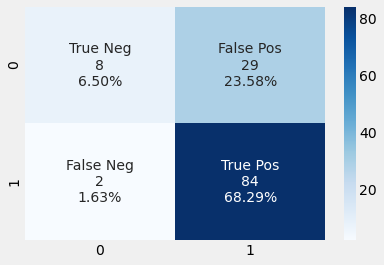

In [29]:
y_pred_svm = svm.predict(X_test)
display_confusion_matrix(y_test, y_pred_svm)
accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machine is :", accuracy_svm)
print("Computation time {} - Sec".format(final_svm))

In [30]:
auc = roc_auc_score(y_test, y_pred_svm)
print('AUC: %.2f' % auc)

#fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
#plot_roc_curve(fpr, tpr)

AUC: 0.60


##### Artificial neural network

In [32]:
from sklearn.neural_network import MLPClassifier

# defining parameter range
param_grid = { 
              'max_iter': [1000]
} 

start_mlp = time.time()
mlp = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
mlp.fit(X_train, y_train.values.ravel())

end_mlp = time.time()
final_mlp = end_mlp - start_mlp
final_mlp = round(final_mlp,3)
final_mlp

# Print the tuned parameters and score 
print("Tuned Artificial neural network Parameters: {}".format(mlp.best_params_)) 
print("Best score is {}".format(mlp.best_score_))
print("Best estimator is {}".format(mlp.best_estimator_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... max_iter=1000, score=0.859, total=   0.4s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.745, total=   0.8s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.724, total=   1.2s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.816, total=   0.9s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.694, total=   0.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished


Tuned Artificial neural network Parameters: {'max_iter': 1000}
Best score is 0.7676355390641105
Best estimator is MLPClassifier(max_iter=1000)


              precision    recall  f1-score   support

           0       1.00      0.22      0.36        37
           1       0.75      1.00      0.86        86

    accuracy                           0.76       123
   macro avg       0.87      0.61      0.61       123
weighted avg       0.82      0.76      0.71       123

Accuracy of Artificial neural network  is : 0.7642276422764228
Computation time 5.282 - Sec


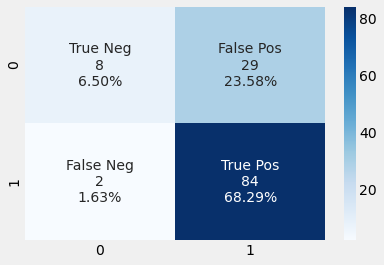

In [33]:
y_pred_mlp = mlp.predict(X_test)
display_confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp=accuracy_score(y_test, y_pred_mlp)
print("Accuracy of Artificial neural network  is :", accuracy_mlp)
print("Computation time {} - Sec".format(final_mlp))

In [35]:
#auc = roc_auc_score(y_test, y_pred_mlp)
print('AUC: %.2f' % auc)

#fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp)
#plot_roc_curve(fpr, tpr)

AUC: 0.60


In [37]:
accuracies2 = [accuracy_lr, accuracy_svm, accuracy_mlp]
final_time2 = [final_lr, final_svm, final_mlp]
print(accuracies2)
print(final_time2)

[0.7479674796747967, 0.7560975609756098, 0.7642276422764228]
[0.383, 2.305, 5.282]


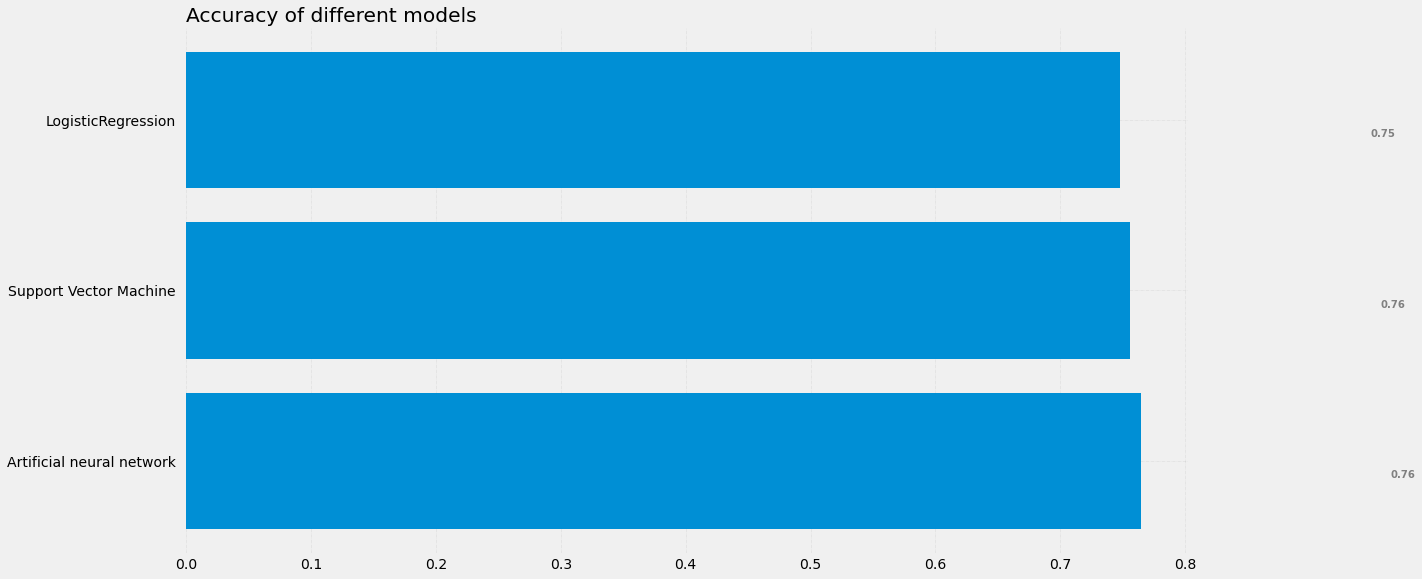

In [38]:
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
# Horizontal Bar Plot 
ax.barh(models, accuracies2) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
            str(round((i.get_width()), 2)), 
            fontsize = 10, fontweight ='bold', 
            color ='grey') 
ax.set_title('Accuracy of different models', loc ='left') 
plt.show() 